**Netflix-это приложение, которое продолжает расти все быстрее и быстрее благодаря своей популярности, шоу и контенту. Все это подтверждают данные вместе с системой рекомендаций на основе контента и широким спектром различных графиков и визуальных эффектов**

Этот набор данных состоит из телешоу и фильмов, доступных на Netflix по состоянию на 2019 год. Набор данных собирается из Flixable, которая является сторонней поисковой системой Netflix.

В 2018 году они опубликовали интересный отчет, который показывает, что количество телешоу на Netflix почти утроилось с 2010 года. С 2010 года количество фильмов в потоковом сервисе сократилось более чем на 2000 наименований, в то время как количество телешоу выросло почти в три раза. Будет интересно изучить, какие еще выводы можно получить из того же набора данных.

Интегрируя этот набор данных с другими внешними наборами данных, такими как рейтинги IMDB, rotten tomatoes также может предоставить много интересных результатов.

https://www.kaggle.com/shivamb/netflix-shows

https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+ratings.csv

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
netflix_overall=pd.read_csv("netflix_titles.csv")
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


набор данных содержит 12 столбцов для исследовательского анализа

In [ ]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

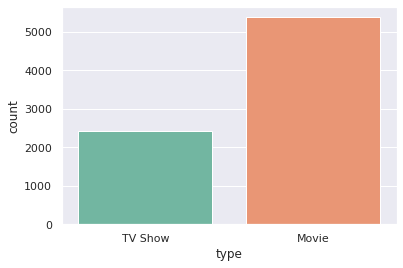

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall, palette="Set2")

Очевидно, что на Netflix больше фильмов, чем телешоу.

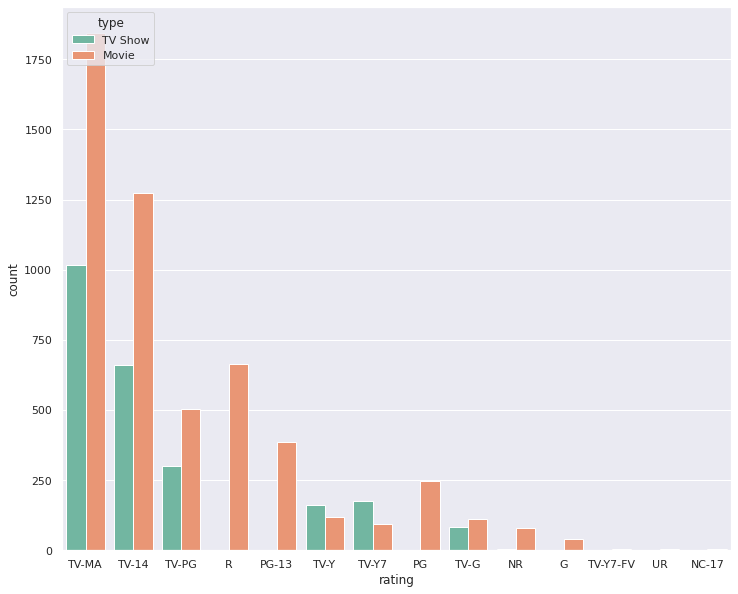

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_overall, palette="Set2", hue= "type", order=netflix_overall['rating'].value_counts().index[0:15])

Наибольшее количество фильмов производится с рейтингом"ТВ-МА". "ТВ-МА" - это рейтинг, присвоенный Родительскими рекомендациями по телевидению телевизионной программе, которая была предназначена только для зрелой аудитории.

Вторым по величине является "ТВ-14", обозначающий контент, который может быть неуместен для детей младше 14 лет.

Третьим по величине является очень популярный рейтинг "R".Фильм с рейтингом R-это фильм, который был оценен Американской ассоциацией киноискусств как имеющий материал, который может быть непригоден для детей в возрасте до 17 лет; MPAA пишет: "Для детей в возрасте до 17 лет требуется сопровождающий родитель или взрослый опекун".

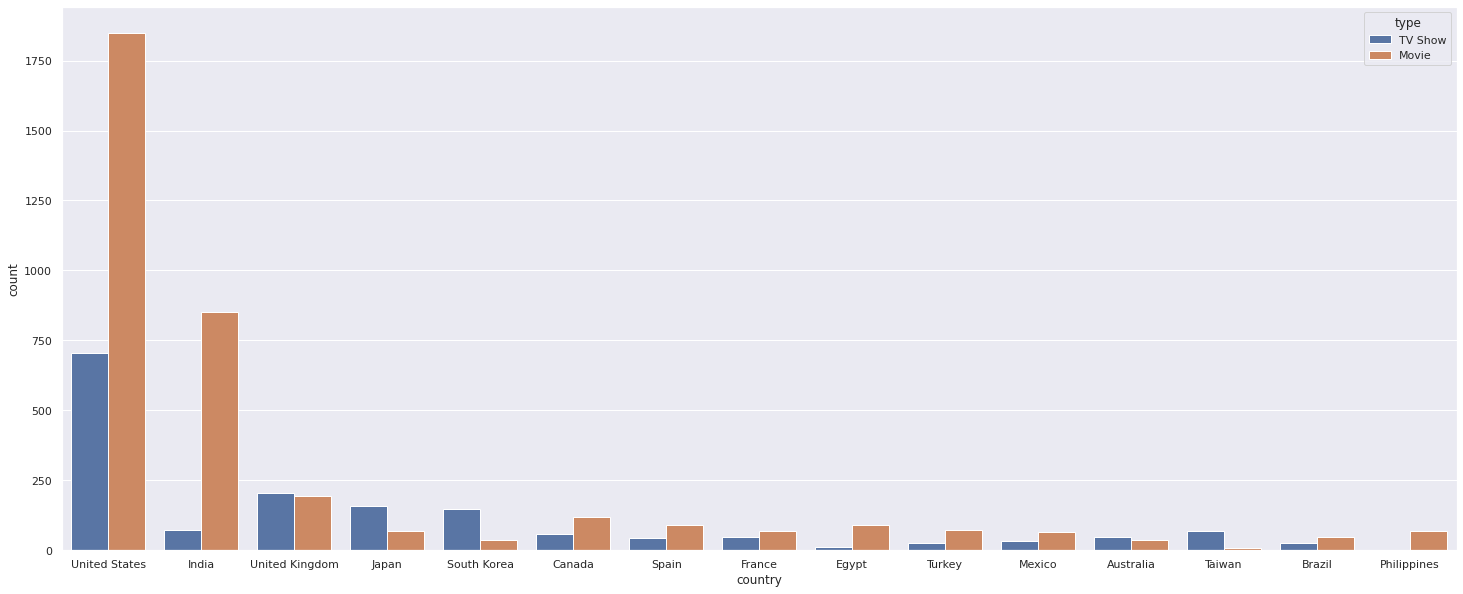

In [ ]:
plt.figure(figsize=(25,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="country",data=netflix_overall,hue= "type",order = netflix_overall['country'].value_counts().index[0:15])

Таким образом,Соединенные Штаты предоставляют наибольшее количество фильмов и телешоу, а затем на 2-м месте Индия предоставляет наибольшее количество фильмов

In [ ]:
temp = netflix_overall[['type', 'release_year']]
temp = temp.value_counts().to_frame()
temp.reset_index(level=[0,1], inplace=True)
temp = temp.rename(columns = {0:'count'})
temp = pd.concat([temp[temp['type'] == 'Movie'][:5], temp[temp['type']== 'TV Show'][:5]])

Text(0.5, 1.0, 'Рост кино/телешоу с годами')

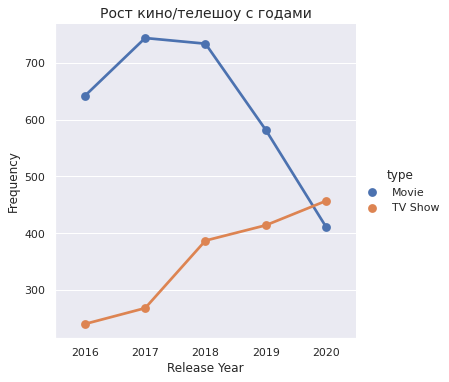

In [ ]:
sns.catplot(x = 'release_year', y = 'count', hue = 'type', data = temp, kind = 'point')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Рост кино/телешоу с годами', size=14)

In [ ]:
imdb_ratings=pd.read_csv('IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(85852, 4)

Выполнение внутреннего объединения набора данных рейтингов и набора данных netflix для получения контента, имеющего рейтинги на IMDB и доступного на Netflix.

In [ ]:
ratings.dropna()
joint_data=ratings.merge(netflix_overall,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

Страны с самым высоким рейтингом контента.

In [ ]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,country
United States,799
India,701
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33
"United Kingdom, United States",31


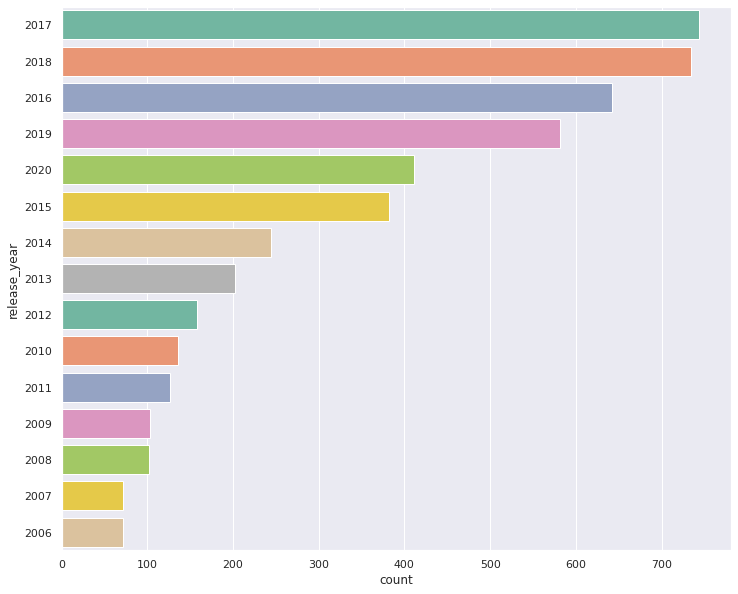

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

2017 год был годом, когда было выпущено большинство фильмов.

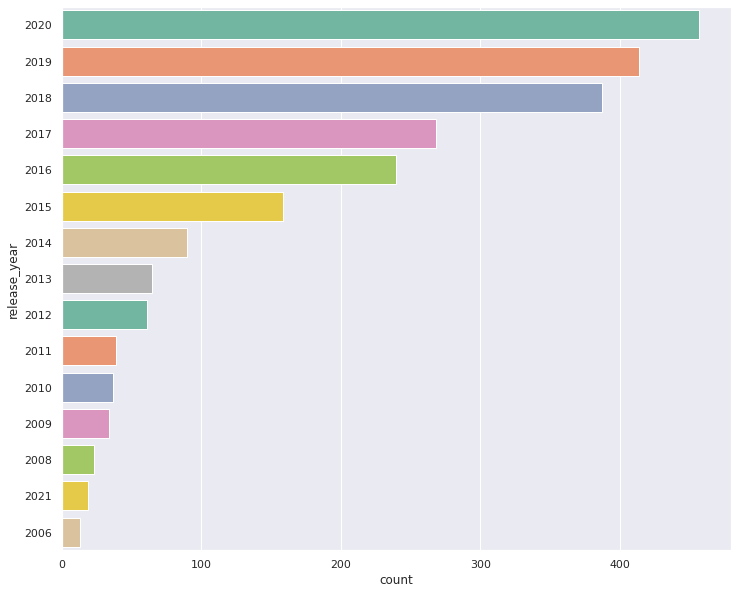

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_shows, palette="Set2", order=netflix_shows['release_year'].value_counts().index[0:15])

2020 год был годом, когда было выпущено большинство теле-шоу.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


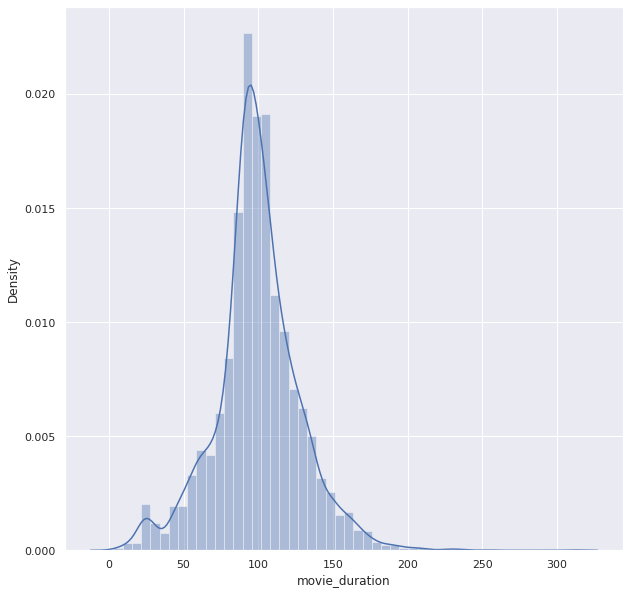

In [ ]:
temp = netflix_overall[netflix_overall['type'] == 'Movie'].reset_index()
temp['movie_duration'] = [int(x.split()[0]) for x in temp['duration'][temp['type'] == 'Movie']]
temp['movie_duration']
bar, ax = plt.subplots(figsize = (10,10))
sns.distplot(a = temp['movie_duration'])

Таким образом, большое количество фильмов на Netflix имеют продолжительность 75-120 минут. Это приемлемо, учитывая тот факт, что значительная часть аудитории не может посмотреть 3-часовой фильм за один присест.

In [ ]:
genre_set = set()

for genres in netflix_overall['listed_in']:
    try:
        listed_in = [genre.strip() for genre in genres.split(',')]
        genre_set.update(listed_in)
    except:
        pass

genre_dictionary = {}
    
for genre in genre_set:
    for genre_list in netflix_overall['listed_in']:
        try:
            listed_in = [genre.strip() for genre in genre_list.split(',')]
            if genre in listed_in:
                if genre in genre_dictionary.keys():
                    genre_dictionary[genre] = genre_dictionary[genre] + 1
                else:
                    genre_dictionary[genre] =1
        except:
            pass
        
genre_list_with_counts = sorted(genre_dictionary.items(), key=lambda x: x[1], reverse=True)

In [ ]:
!pip install squarify

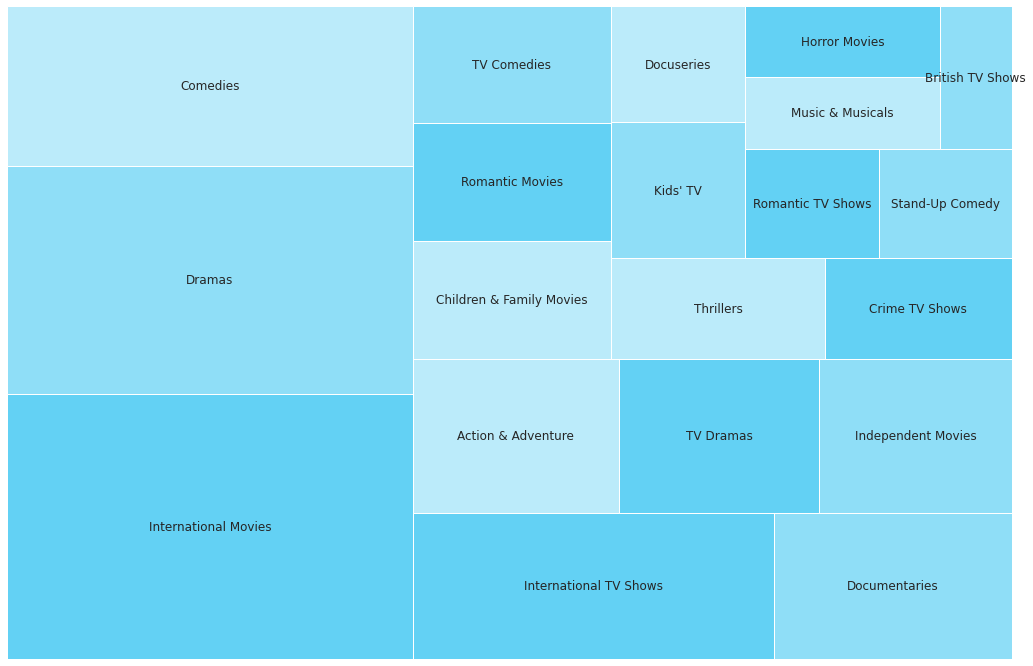

In [ ]:
import squarify

plt.figure(figsize=(18, 12))

labels = [genre_counts[0] for genre_counts in genre_list_with_counts[:20]]
sizes = [genre_counts[1] for genre_counts in genre_list_with_counts[:20]]

squarify.plot(sizes=sizes, label=labels, color=["#63D1F4","#8FDEF7","#BBEBFA"])

plt.axis('off')
plt.show()

In [ ]:
top_listed_in=netflix_movies["listed_in"].value_counts()[0:20]
top_listed_in.head()

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Name: listed_in, dtype: int64

Среди фильмов наиболее распространены детективы

Давайте выясним , какие жанровые фильмы/телешоу получают наибольшее количество рейтингов, по какому рейтингу

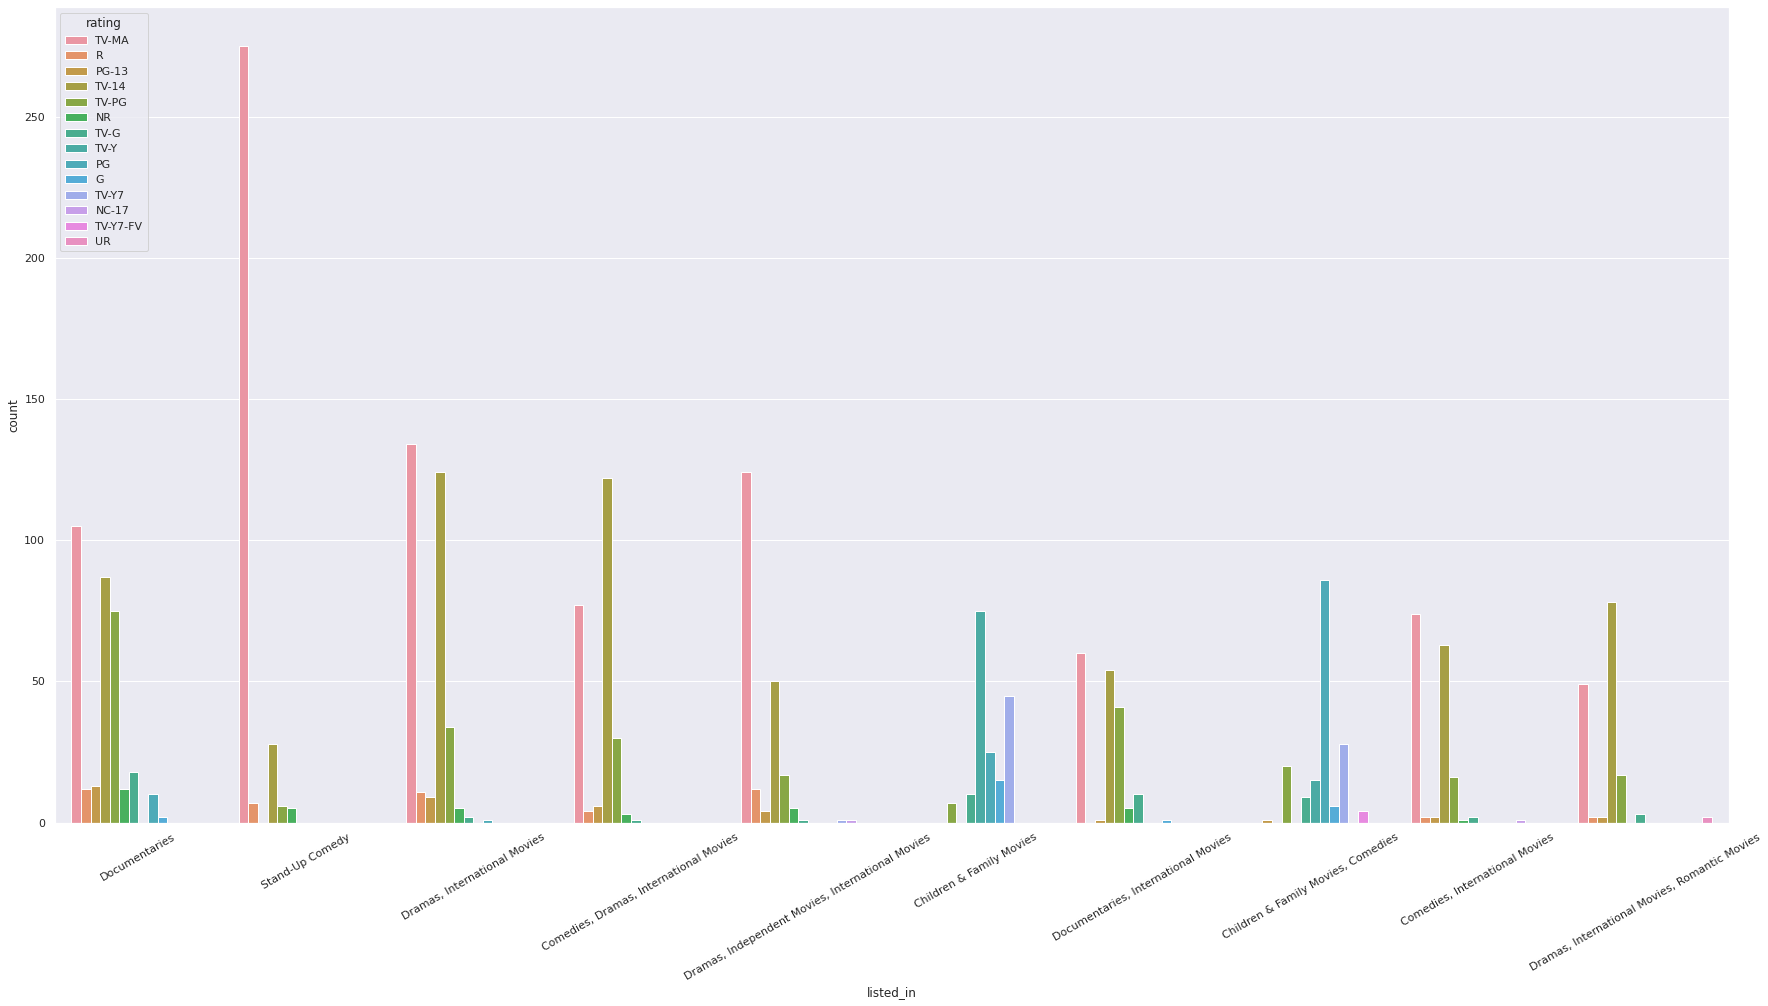

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
sns.countplot(x='listed_in',hue='rating',data = netflix_movies,order = netflix_movies["listed_in"].value_counts().index[0:10])
plt.xticks(rotation = 30)
plt.show()

Фильмы драматического типа в основном оцениваются TV-14, а большинство комедийных фильмов оцениваются TV-MA

In [ ]:
old = netflix_overall.sort_values("release_year",ascending=True)
old[["title","type","country","release_year"]].head(20)

,title,type,country,release_year
4867,Pioneers: First Women Filmmakers*,TV Show,NaN,1925
6117,The Battle of Midway,Movie,United States,1942
4960,Prelude to War,Movie,United States,1942
7679,WWII: Report from the Aleutians,Movie,United States,1943
7342,Undercover: How to Operate Behind Enemy Lines,Movie,United States,1943
7616,Why We Fight: The Battle of Russia,Movie,United States,1943
7268,Tunisian Victory,Movie,"United States, United Kingdom",1944
6699,The Negro Soldier,Movie,United States,1944
6657,The Memphis Belle: A Story of a\nFlying Fortress,Movie,United States,1944
5371,San Pietro,Movie,United States,1945


In [ ]:
kids_show=netflix_overall[netflix_overall["listed_in"] == "Kids' TV"].reset_index()
kids_show[["title","country","release_year"]].head(10)

,title,country,release_year
0,44 Cats,Italy,2018
1,Abby Hatcher,"United States, Canada",2019
2,Alphablocks,United Kingdom,2014
3,Ask the StoryBots,United States,2019
4,Bal Ganesh,NaN,2019
5,Barbie Dreamhouse Adventures,"United States, Canada",2018
6,Barbie Dreamhouse Adventures: Go Team Roberts,NaN,2020
7,Bat Pat,Italy,2016
8,Be-Be-Bears,Russia,2018
9,Beat Bugs,"Australia, Canada",2018


## Система Рекомендаций 

Оценка TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF))-это частота встречаемости слова в документе, уменьшенная на количество документов, в которых оно встречается. Это делается для того, чтобы уменьшить важность слов, которые часто встречаются в обзорах сюжетов, и, следовательно, их значение при вычислении окончательной оценки сходства.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# удаление стоп слов
tfidf = TfidfVectorizer(stop_words='english')

# замена NaN пустой строкой
netflix_overall['description'] = netflix_overall['description'].fillna('')

# создание матрицу TF-IDF путем подгонки и преобразования данных
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

# вывод размера матрицы
tfidf_matrix.shape

(7787, 17905)

Здесь используется оценка косинусного сходства, поскольку она не зависит от величины и относительно проста и быстра в вычислении.

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Вычислить матрицу косинусного подобия
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(netflix_overall.index, index=netflix_overall['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Получите оценки сходства пары всех фильмов с этим фильмом
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Сортировка фильмов на основе оценок сходства
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Получите оценки 10 самых похожих фильмов
    sim_scores = sim_scores[1:11]

    # Получите индексы фильмов
    movie_indices = [i[0] for i in sim_scores]

    # Верните топ-10 самых похожих фильмов
    return netflix_overall['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Rocky')

5247                                            Rocky III
5248                                             Rocky IV
5246                                             Rocky II
6142                                          The Bleeder
5068    Raiders!: The Story of the Greatest Fan Film E...
2492                                      Goodbye My Wife
46                                       1 Chance 2 Dance
3375                                    Kill Bill: Vol. 1
7392                                        Vantage Point
1927                                Ee Nagaraniki Emaindi
Name: title, dtype: object

In [ ]:
get_recommendations('Bad Boys')

688           Bad Boys II
4037             Merantau
1799               Dollar
5623       Sing On! Spain
3529    Lara and the Beat
5227                 Rize
4670     Operation Odessa
2691              Hellboy
4097              Mile 22
805             Before 30
Name: title, dtype: object

**Видно, что модель работает хорошо, но не очень точно.Поэтому для повышения производительности в модель добавляется больше метрик.**

### Фильтрация контента на основе нескольких метрик

Фильтрация контента на основе следующих факторов:

* Title
* Cast
* Director
* Listed in
* Plot

In [ ]:
filledna=netflix_overall.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [ ]:
# Очистка данных - создание всех слов в нижнем регистре
def clean_data(x):
  return str.lower(x.replace(" ", ""))

In [ ]:
# Определение объектов, по которым должна быть отфильтрована модель

In [ ]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [ ]:
for feature in features:
  filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head()

,title,director,cast,listed_in,description
0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...
1,7:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap..."
2,23:59,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","horrormovies,internationalmovies","whenanarmyrecruitisfounddead,hisfellowsoldiers..."
3,9,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","action&adventure,independentmovies,sci-fi&fantasy","inapostapocalypticworld,rag-dollrobotshideinfe..."
4,21,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",dramas,abrilliantgroupofstudentsbecomecard-countingex...


In [ ]:
# Создание "мешка слов" для всех строк
def create_soup(x):
  return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [ ]:
filledna['soup'] = filledna.apply(create_soup, axis=1)

С этого момента код в основном похож на верхнюю модель, за исключением того, что вместо tfidf используется векторизатор count.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [ ]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Получите оценки сходства пары всех фильмов с этим фильмом
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Сортировка фильмов на основе оценок сходства
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Получите оценки 10 самых похожих фильмов
    sim_scores = sim_scores[1:11]

    # Получите индексы фильмов
    movie_indices = [i[0] for i in sim_scores]

    # Верните топ-10 самых похожих фильмов
    return netflix_overall['title'].iloc[movie_indices]

In [ ]:
get_recommendations_new('Rocky', cosine_sim2)

5246                Rocky II
5249                 Rocky V
5247               Rocky III
5248                Rocky IV
280                Abdo Mota
1236         Casino Tycoon 2
6186                The Bund
5907                Superfly
4300    Mutiny on the Bounty
5351                 Saladin
Name: title, dtype: object

In [ ]:
get_recommendations_new('Bad Boys', cosine_sim2)


688                   Bad Boys II
1002                  Blue Streak
4032              Men in Black II
3059    Iron Sky: The Coming Race
7376                   Used Goods
6637    The Man Who Feels No Pain
7623               Wild Wild West
2743                   Himmatwala
5393                  Sardaarji 2
4031                 Men in Black
Name: title, dtype: object

**Новая модель с увеличеным числом параметров предлагает более релевантный список фильмов, что говорит об улучшении качества модели!**